In [1]:
import warnings

import bionty as bt
import lamindb as ln
import spatialdata as sd

warnings.filterwarnings("ignore")

→ connected lamindb: scverse/spatialdata-db


# Query and download spatialdata from lamin's scverse/spatialdata-db

To be able to search for datasets and download them, first we need to specify the lamin instance (data ressource) that we want to work with:

In [5]:
!lamin connect scverse/spatialdata-db

→ connected lamindb: scverse/spatialdata-db


Then, we can query for datasets (= artifacts) via `ln.Artifact.filter`, which returns a list of artifacts. We get an overview of the aritfacts that match the search criteria via `query.df()` and can select individual artifact either via list index `query[1]` or using the artifact uid `ln.Artifact.get('ubllg1iYQBaiDJfW0000')`. 

More on query and search can be found on [Lamin query & search](https://docs.lamin.ai/registries).

In [9]:
organisms = bt.Organism.lookup()
tissues = bt.Tissue.lookup()

query = ln.Artifact.filter(
    organisms=organisms.mouse,
    tissues=tissues.brain,
)
query.df()

,uid,key,description,suffix,kind,otype,size,hash,n_files,n_observations,_hash_type,_key_is_virtual,_overwrite_versions,space_id,storage_id,schema_id,version,is_latest,run_id,created_at,created_by_id,_aux,_branch_code
id,,,,,,,,,,,,,,,,,,,,,,,
272,wg5zQhHX5cQ9UG4N0000,None,"10X, Visium, Mouse, unknown, brain, 2020",.zarr,None,spatialdata,57953090,raOCaxJLh_weCxY7z4mu3w,327,None,md5-d,True,True,1,2,None,None,True,244.0,2025-01-19 21:29:00.556320+00:00,8,None,1
222,ubllg1iYQBaiDJfW0000,None,"10X, VisiumHD, Mouse, Healthy, Brain, 2024",.zarr,None,spatialdata,1099865189,r3sSzfkOliLFFfhDzmP9hw,2215,None,md5-d,True,True,1,2,None,None,True,197.0,2024-12-16 10:07:09.710482+00:00,8,None,1
284,AqRfNjb1YHyMDZt00000,None,"10X, Visium, Mouse, healthy, brain, 2022",.zarr,None,spatialdata,54817400,NTOnZzCUoYiXjypzHEud7g,327,None,md5-d,True,True,1,2,None,None,True,239.0,2025-01-19 21:45:48.348520+00:00,8,None,1
298,wlgPi3jjfVoYUWjA0000,None,"10X, Visium, Mouse, healthy, brain, 2023",.zarr,None,spatialdata,116459181,Ss6q2vgfyG3ARYWp0SUmsg,443,None,md5-d,True,True,1,2,None,None,True,252.0,2025-01-21 14:17:50.268625+00:00,8,None,1
268,SYTEY2CR0OfTdq4N0000,None,"10X, Visium, Mouse, unknown, brain, 2019",.zarr,None,spatialdata,56180342,pgkbcq_Rhf24MfhY-1zc1Q,327,None,md5-d,True,True,1,2,None,None,True,NaN,2025-01-19 21:19:25.551402+00:00,8,None,1
270,8Xdm6p3J8FPOxok00000,None,"10X, Visium, Mouse, unknown, brain, 2020",.zarr,None,spatialdata,38143587,1SFkEeE1UvvswCpuCstDPw,327,None,md5-d,True,True,1,2,None,None,True,241.0,2025-01-19 21:25:28.550886+00:00,8,None,1
271,KgUohDusDLA4S6WW0000,None,"10X, Visium, Mouse, unknown, brain, 2020",.zarr,None,spatialdata,38143587,Xdl3V5khe8508IjaJQhm8g,327,None,md5-d,True,True,1,2,None,None,True,241.0,2025-01-19 21:26:41.761595+00:00,8,None,1
269,McoRBaiIuHp0Q8RQ0000,None,"10X, Visium, Mouse, healthy, brain, 2022",.zarr,None,spatialdata,54841203,PlYRrY4VI-frNKHES5gvqw,327,None,md5-d,True,True,1,2,None,None,True,240.0,2025-01-19 21:23:37.660374+00:00,8,None,1
288,4gLfyEWea7fJpXyQ0000,None,"10X, Visium, Mouse, unknown, brain, 2020",.zarr,None,spatialdata,54817412,yocuS6gw1aoX2zwDNZsebg,327,None,md5-d,True,True,1,2,None,None,True,243.0,2025-01-19 21:51:51.708790+00:00,8,None,1


In [21]:
ln.Artifact.get("8Xdm6p3J8FPOxok00000")

Artifact(uid='8Xdm6p3J8FPOxok00000', is_latest=True, description='10X, Visium, Mouse, unknown, brain, 2020', suffix='.zarr', otype='spatialdata', size=38143587, hash='1SFkEeE1UvvswCpuCstDPw', n_files=327, space_id=1, storage_id=2, run_id=241, created_by_id=8, created_at=2025-01-19 21:25:28 UTC)

In [22]:
sdata = query[5]  # == ln.Artifact.get('ubllg1iYQBaiDJfW0000')
sdata

Artifact(uid='8Xdm6p3J8FPOxok00000', is_latest=True, description='10X, Visium, Mouse, unknown, brain, 2020', suffix='.zarr', otype='spatialdata', size=38143587, hash='1SFkEeE1UvvswCpuCstDPw', n_files=327, space_id=1, storage_id=2, run_id=241, created_by_id=8, created_at=2025-01-19 21:25:28 UTC)

To get a more detailed overview of the information associated to the artifact, use `artifact.describe()`. This overview also helps to check which other features can be used to search and filter the database.

In [23]:
sdata.describe()

Artifact .zarr/spatialdata
├── General
│   ├── .uid = '8Xdm6p3J8FPOxok00000'
│   ├── .size = 38143587
│   ├── .hash = '1SFkEeE1UvvswCpuCstDPw'
│   ├── .n_files = 327
│   ├── .path = s3://scverse-spatial-eu-central-1/.lamindb/8Xdm6p3J8FPOxok0.zarr
│   ├── .created_by = zimea (Lea Zimmermann)
│   ├── .created_at = 2025-01-19 22:25:28
│   └── .transform = 'Upload 10X, Visium, Mouse, unknown, brain, 2020'
├── Dataset features/._schemas_m2m
│   ├── sample • 17                 [Feature]                                                           
│   │   assay                       cat[bionty.ExperimentalF…  Visium Spatial Gene Expression           
│   │   chemistry_version           cat[ULabel]                v1                                       
│   │   disease                     cat[bionty.Disease][ULab…  unknown                                  
│   │   license                     cat[ULabel]                Creative Commons Attribution             
│   │   organism                    cat[bionty.Organism][ULa…  mouse                                    
│   │   preproc_version             cat[ULabel]                Space Ranger version 1.1.0               
│   │   tissue                      cat[bionty.Tissue][ULabe…  brain                                    
│   │   specimen                    cat[ULabel]                                                         
│   │   data_provider               cat[ULabel]                                                         
│   │   omics                       cat[ULabel]                                                         
│   │   magnification               num                                                                 
│   │   microm_per_pixel            float                                                               
│   │   microm_per_pixel_estimated  float                                                               
│   │   protocol_url                str                                                                 
│   │   date                        datetime                                                            
│   │   disease_details             str                                                                 
│   │   url                         str                                                                 
│   └── ['table'].var • 32272       [bionty.Gene]                                                       
└── Labels
    └── .organisms                  bionty.Organism            mouse                                    
        .tissues                    bionty.Tissue              brain                                    
        .diseases                   bionty.Disease             unknown                                  
        .experimental_factors       bionty.ExperimentalFactor  Visium Spatial Gene Expression           
        .ulabels                    ULabel                     Creative Commons Attribution, Space Rang…

Instead of filtering for sample level metadata, we could also query for datasets that contain the expression of specific genes, e.g the expression of 'Gfap':

In [4]:
ln.Artifact.filter(feature_sets__genes__symbol="Gfap").df()

,uid,key,description,suffix,kind,otype,size,hash,n_files,n_observations,_hash_type,_key_is_virtual,_overwrite_versions,space_id,storage_id,schema_id,version,is_latest,run_id,created_at,created_by_id,_aux,_branch_code
id,,,,,,,,,,,,,,,,,,,,,,,
222,ubllg1iYQBaiDJfW0000,None,"10X, VisiumHD, Mouse, Healthy, Brain, 2024",.zarr,None,spatialdata,1099865189,r3sSzfkOliLFFfhDzmP9hw,2215,None,md5-d,True,True,1,2,None,None,True,197.0,2024-12-16 10:07:09.710482+00:00,8,None,1
268,SYTEY2CR0OfTdq4N0000,None,"10X, Visium, Mouse, unknown, brain, 2019",.zarr,None,spatialdata,56180342,pgkbcq_Rhf24MfhY-1zc1Q,327,None,md5-d,True,True,1,2,None,None,True,NaN,2025-01-19 21:19:25.551402+00:00,8,None,1
269,McoRBaiIuHp0Q8RQ0000,None,"10X, Visium, Mouse, healthy, brain, 2022",.zarr,None,spatialdata,54841203,PlYRrY4VI-frNKHES5gvqw,327,None,md5-d,True,True,1,2,None,None,True,240.0,2025-01-19 21:23:37.660374+00:00,8,None,1
270,8Xdm6p3J8FPOxok00000,None,"10X, Visium, Mouse, unknown, brain, 2020",.zarr,None,spatialdata,38143587,1SFkEeE1UvvswCpuCstDPw,327,None,md5-d,True,True,1,2,None,None,True,241.0,2025-01-19 21:25:28.550886+00:00,8,None,1
271,KgUohDusDLA4S6WW0000,None,"10X, Visium, Mouse, unknown, brain, 2020",.zarr,None,spatialdata,38143587,Xdl3V5khe8508IjaJQhm8g,327,None,md5-d,True,True,1,2,None,None,True,241.0,2025-01-19 21:26:41.761595+00:00,8,None,1
272,wg5zQhHX5cQ9UG4N0000,None,"10X, Visium, Mouse, unknown, brain, 2020",.zarr,None,spatialdata,57953090,raOCaxJLh_weCxY7z4mu3w,327,None,md5-d,True,True,1,2,None,None,True,244.0,2025-01-19 21:29:00.556320+00:00,8,None,1
284,AqRfNjb1YHyMDZt00000,None,"10X, Visium, Mouse, healthy, brain, 2022",.zarr,None,spatialdata,54817400,NTOnZzCUoYiXjypzHEud7g,327,None,md5-d,True,True,1,2,None,None,True,239.0,2025-01-19 21:45:48.348520+00:00,8,None,1
288,4gLfyEWea7fJpXyQ0000,None,"10X, Visium, Mouse, unknown, brain, 2020",.zarr,None,spatialdata,54817412,yocuS6gw1aoX2zwDNZsebg,327,None,md5-d,True,True,1,2,None,None,True,243.0,2025-01-19 21:51:51.708790+00:00,8,None,1
298,wlgPi3jjfVoYUWjA0000,None,"10X, Visium, Mouse, healthy, brain, 2023",.zarr,None,spatialdata,116459181,Ss6q2vgfyG3ARYWp0SUmsg,443,None,md5-d,True,True,1,2,None,None,True,252.0,2025-01-21 14:17:50.268625+00:00,8,None,1


But for now, let's continue with the dataset that we selected earlier. We can now cache the dataset, to download and store it locally:

In [24]:
sdata.cache()

! run input wasn't tracked, call `ln.track()` and re-run


PosixUPath('/home/icb/lea.zimmermann/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/8Xdm6p3J8FPOxok0.zarr')

In [28]:
sdata_local = sd.read_zarr(
    "/home/icb/lea.zimmermann/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/8Xdm6p3J8FPOxok0.zarr"
)
sdata_local

SpatialData object, with associated Zarr store: /ictstr01/home/icb/lea.zimmermann/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/8Xdm6p3J8FPOxok0.zarr
├── Images
│     ├── 'V1_Adult_Mouse_Brain_Coronal_Section_2_full_image': DataTree[cyx] (3, 2000, 2000), (3, 1000, 1000), (3, 500, 500), (3, 250, 250), (3, 125, 125)
│     ├── 'V1_Adult_Mouse_Brain_Coronal_Section_2_hires_image': DataArray[cyx] (3, 2000, 2000)
│     └── 'V1_Adult_Mouse_Brain_Coronal_Section_2_lowres_image': DataArray[cyx] (3, 600, 600)
├── Shapes
│     └── 'V1_Adult_Mouse_Brain_Coronal_Section_2': GeoDataFrame shape: (2807, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (2807, 32285)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        V1_Adult_Mouse_Brain_Coronal_Section_2_hires_image (Images), V1_Adult_Mouse_Brain_Coronal_Section_2 (Shapes)
    ▸ 'downscaled_lowres', with elements:
        V1_Adult_Mouse_Brain_Coronal_Section_2_lowres_image (Images), V1_Adult_Mouse_Brain_Coronal_Section

But we can also see, which other datasets our selected dataset is connected to, since they might be interesting as well.

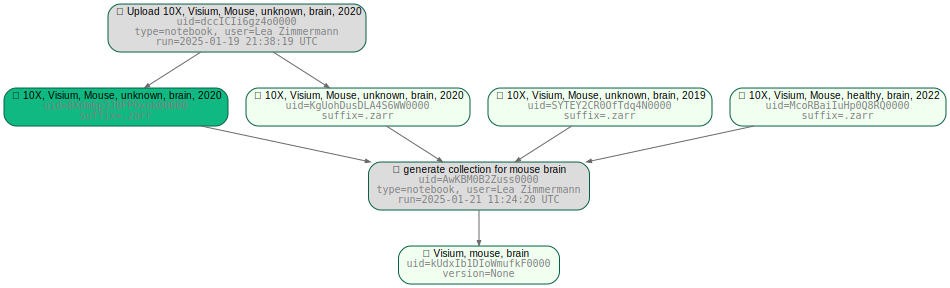

In [25]:
sdata.view_lineage()

In this case we found a collection of datasets called 'Visium, mouse, brain'. We can simply download all of these datasets via:

In [29]:
mouse_collection = ln.Collection.get("kUdxIb1DIoWmufkF0000")

In [30]:
mouse_collection.cache()

! run input wasn't tracked, call `ln.track()` and re-run
! run input wasn't tracked, call `ln.track()` and re-run
! run input wasn't tracked, call `ln.track()` and re-run
! run input wasn't tracked, call `ln.track()` and re-run
! run input wasn't tracked, call `ln.track()` and re-run


[PosixUPath('/home/icb/lea.zimmermann/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/8Xdm6p3J8FPOxok0.zarr'),
 PosixUPath('/home/icb/lea.zimmermann/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/KgUohDusDLA4S6WW.zarr'),
 PosixUPath('/home/icb/lea.zimmermann/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/SYTEY2CR0OfTdq4N.zarr'),
 PosixUPath('/home/icb/lea.zimmermann/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/McoRBaiIuHp0Q8RQ.zarr')]

In [32]:
sdata2 = sd.read_zarr(
    "/home/icb/lea.zimmermann/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/8Xdm6p3J8FPOxok0.zarr"
)
sdata2

SpatialData object, with associated Zarr store: /ictstr01/home/icb/lea.zimmermann/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/8Xdm6p3J8FPOxok0.zarr
├── Images
│     ├── 'V1_Adult_Mouse_Brain_Coronal_Section_2_full_image': DataTree[cyx] (3, 2000, 2000), (3, 1000, 1000), (3, 500, 500), (3, 250, 250), (3, 125, 125)
│     ├── 'V1_Adult_Mouse_Brain_Coronal_Section_2_hires_image': DataArray[cyx] (3, 2000, 2000)
│     └── 'V1_Adult_Mouse_Brain_Coronal_Section_2_lowres_image': DataArray[cyx] (3, 600, 600)
├── Shapes
│     └── 'V1_Adult_Mouse_Brain_Coronal_Section_2': GeoDataFrame shape: (2807, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (2807, 32285)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        V1_Adult_Mouse_Brain_Coronal_Section_2_hires_image (Images), V1_Adult_Mouse_Brain_Coronal_Section_2 (Shapes)
    ▸ 'downscaled_lowres', with elements:
        V1_Adult_Mouse_Brain_Coronal_Section_2_lowres_image (Images), V1_Adult_Mouse_Brain_Coronal_Section